<a href="https://colab.research.google.com/github/pawan070bct27/Lung_cancer_Kflod_SVM/blob/main/SVM_of_k_fold_of_dataset_lung_PCA_xy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.layers import AveragePooling2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Loading the dataset

In [ ]:
data_xy = np.load('train_xy.npy')

In [ ]:
label_xy = np.load('train_label_xy.npy')

In [ ]:
data_xy.shape

(1002, 3136)

In [ ]:
np.shape(label_xy)

(1002,)

The dataset consists of 167 images of size 56*56 each. Among the 1002 data points, each consecutive six data points from the beginning represent an object. So it needs to be further reshaped.

# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(data_xy)
pca.explained_variance_ratio_

array([3.57339124e-01, 1.42144324e-01, 1.28344032e-01, ...,
       2.14172089e-18, 7.75055074e-19, 7.04727162e-32])

In [ ]:
pca.explained_variance_ratio_.shape

(1002,)

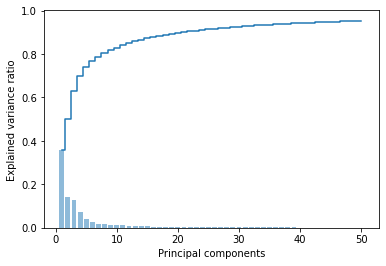

In [ ]:
plt.bar(range(1, 51), pca.explained_variance_ratio_[:50], alpha=0.5, align='center')
plt.step(range(1, 51), np.cumsum(pca.explained_variance_ratio_)[:50], where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

From the above diagram we can see that the first 10 of the features are most contributing for the feature extraction and finally for classification.

In [ ]:
np.cumsum(pca.explained_variance_ratio_).shape

(1002,)

In [ ]:
X_pca.shape

(1002, 1002)

In [ ]:
label_xy.shape

(1002,)

In [ ]:
X_pca_new = X_pca[:,:5]
X_pca_new.shape

(1002, 5)

In [ ]:
X_pca_new = X_pca_new.reshape(167,6,5)
label_xy = label_xy.reshape(167,6,)

# Splitting of dataset into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_new, label_xy, test_size=0.3, random_state=101, shuffle = True)



In [ ]:
X_train.shape

(116, 6, 5)

In [ ]:
y_train.shape

(116, 6)

In [ ]:
X_test.shape

(51, 6, 5)

In [ ]:
y_test.shape

(51, 6)

In [ ]:
X_train = X_train.reshape(X_train.shape[0]*6, 5)
y_train = y_train.reshape(y_train.shape[0]*6,)

X_test = X_test.reshape(X_test.shape[0]*6, 5)
y_test = y_test.reshape(y_test.shape[0]*6,)

In [ ]:
X_train.shape

(696, 5)

In [ ]:
X_test.shape

(306, 5)

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
from sklearn.svm import SVC
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
from sklearn.model_selection import KFold
kfold = KFold(n_splits= 5, shuffle=True)


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  
    # define support vector classifier
  svm = SVC(kernel='linear', probability=True, random_state=42)
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # fit model
  svm.fit(inputs[train], targets[train])
  # Generate generalization metrics
  scores = svm.predict(inputs[test], targets[test])
  print(f'Score for fold {fold_no}: {svm.metrics_names[0]} of {scores[0]}; {svm.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')



------------------------------------------------------------------------
Training for fold 1 ...


TypeError: ignored

In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.figure(0) 
plt.plot(history.history['accuracy'],'r') 
plt.plot(history.history['val_accuracy'],'g') 
plt.xticks(np.arange(0, 150, 5.0)) 
plt.rcParams['figure.figsize'] = (12, 8) 
plt.xlabel("Num of Epochs") 
plt.ylabel("Accuracy") 
plt.title("Training Accuracy vs Validation Accuracy") 
plt.legend(['train','validation']) 

plt.show()

plt.figure(1) 
plt.plot(history.history['loss'],'r') 
plt.plot(history.history['val_loss'],'g') 
plt.xticks(np.arange(0, 150, 5.0)) 
plt.rcParams['figure.figsize'] = (12, 8) 
plt.xlabel("Num of Epochs") 
plt.ylabel("Loss") 
plt.title("Training Loss vs Validation Loss") 
plt.legend(['train','validation']) 

plt.show()

# Evaluation of Training model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)